# Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from utils_v8 import *

/home/pasan/anaconda3/envs/tfgpu2roar/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Plots

## Fetch results

In [2]:
# Directories where the results are stored
data_dirs = ['results/adultincome_naivedat', 
             'results/compas_naivedat', 
             'results/defaultcredit_naivedat', 
             'results/heloc_naivedat']

naive_avgs = []
smart_avgs = []
naive_vars = []
smart_vars = []
naive_uni_avgs = []
smart_uni_avgs = []
naive_uni_vars = []
smart_uni_vars = []
ques = []
for i in range(len(data_dirs)):
    exp_dir = './{}'.format(data_dirs[i])

    fid_naive = np.load('{}/{}'.format(exp_dir,'fid_naive.npy'))
    fid_smart = np.load('{}/{}'.format(exp_dir,'fid_smart.npy'))
    fid_uni_naive = np.load('{}/{}'.format(exp_dir,'fid_uni_naive.npy'))
    fid_uni_smart = np.load('{}/{}'.format(exp_dir,'fid_uni_smart.npy'))
    acc_naive = np.load('{}/{}'.format(exp_dir,'acc_naive.npy'))
    acc_smart = np.load('{}/{}'.format(exp_dir,'acc_smart.npy'))

    naive_avgs.append(np.mean(fid_naive, axis=0))
    smart_avgs.append(np.mean(fid_smart, axis=0))
    naive_vars.append(np.var(fid_naive, axis=0))
    smart_vars.append(np.var(fid_smart, axis=0))
    naive_uni_avgs.append(np.mean(fid_uni_naive, axis=0))
    smart_uni_avgs.append(np.mean(fid_uni_smart, axis=0))
    naive_uni_vars.append(np.var(fid_uni_naive, axis=0))
    smart_uni_vars.append(np.var(fid_uni_smart, axis=0))
    ques.append(fid_naive.shape[1])


## Plot results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
<ipython-input-4-f7f3a4337eba>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2*n_models-1, j].set_xticklabels(x_ticks)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that

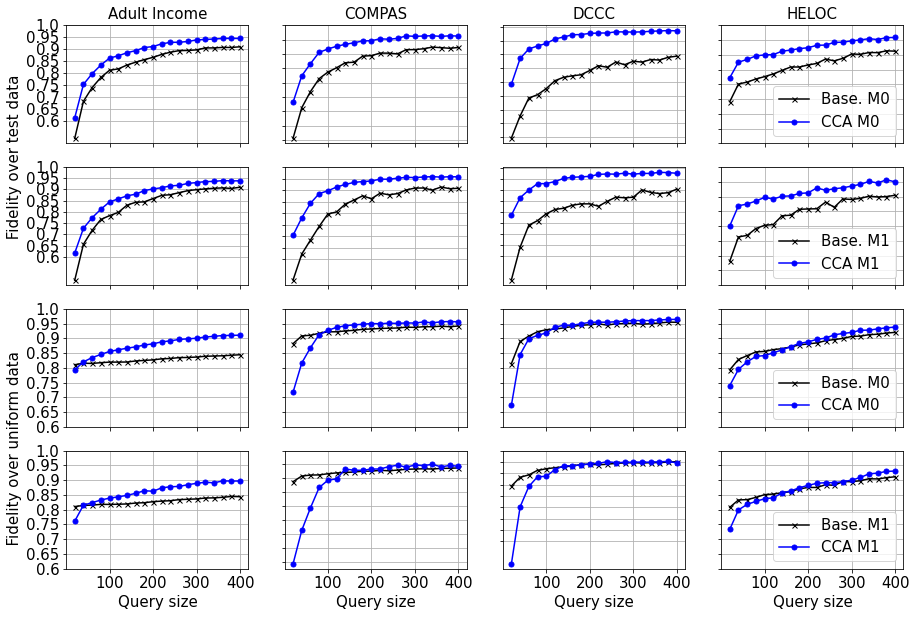

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
<ipython-input-4-f7f3a4337eba>:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[2*n_models-1, j].set_xticklabels(x_ticks)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that

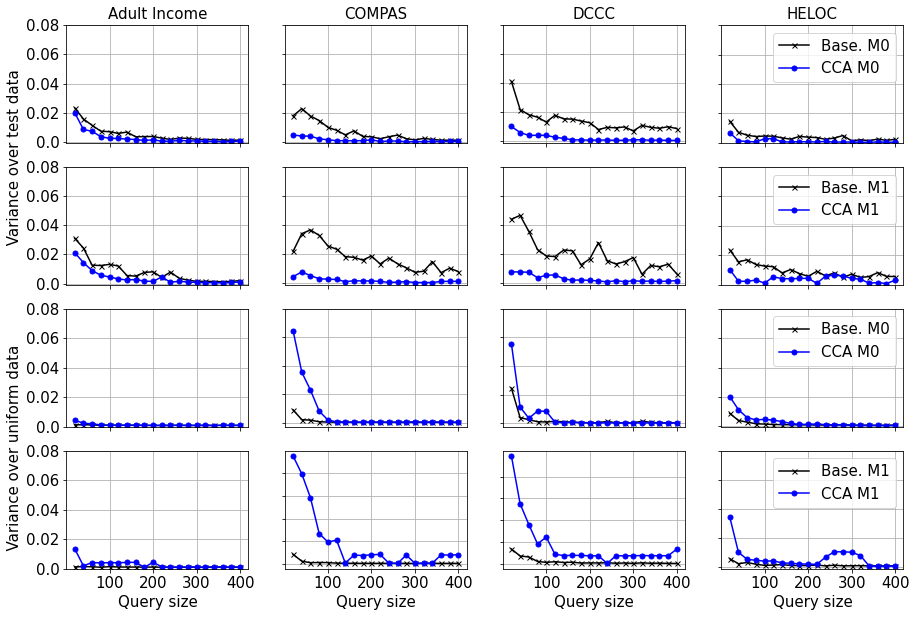

In [4]:
data_titles = ['Adult Income', 'COMPAS', 'DCCC', 'HELOC']

query_size = 20

SMALL_SIZE = 15
MEDIUM_SIZE = 25
BIGGER_SIZE = 28
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE)   # fontsize of the figure title

n_data_dirs = len(data_dirs)
n_models = naive_avgs[0].shape[1]
fig, axs = plt.subplots(2*n_models, n_data_dirs)
fig.set_figheight(10)
fig.set_figwidth(15) #15
y_ticks = np.round(np.arange(0.6, 1.01, 0.05), 2)
x_ticks = np.arange(100, 500, 100) # np.arange(0, 450, 100)
marker_size = 5
colors = ['r', 'b']
for j in range(n_data_dirs):
    for k in range(n_models):
        axs[k, j].plot(np.arange(1, ques[j]+1)*query_size, naive_avgs[j][:,k], '-x', label='Base. M{}'.format(k), color='k', markersize=marker_size)
        axs[k, j].plot(np.arange(1, ques[j]+1)*query_size, smart_avgs[j][:,k], '-o', label='CCA M{}'.format(k), color='b', markersize=marker_size)
        axs[k, j].grid(True)
        axs[k, j].set_yticks(y_ticks)
        axs[k, j].set_xticks(x_ticks)
        axs[k, j].set_yticklabels([])
        axs[k, j].set_xticklabels([])
        axs[k, 0].set_yticklabels(y_ticks)
        axs[0, j].set_title(data_titles[j])
        axs[k, n_data_dirs-1].legend(loc='lower right')
        # axs[k, n_data_dirs-1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        axs[n_models-1, 0].set(ylabel='                             Fidelity over test data')
                
        axs[n_models+k, j].plot(np.arange(1, ques[j]+1)*query_size, naive_uni_avgs[j][:,k], '-x', label='Base. M{}'.format(k), color='k', markersize=marker_size)
        axs[n_models+k, j].plot(np.arange(1, ques[j]+1)*query_size, smart_uni_avgs[j][:,k], '-o', label='CCA M{}'.format(k), color='b', markersize=marker_size)
        axs[n_models+k, j].grid(True)
        axs[n_models+k, j].set_yticks(y_ticks)
        axs[n_models+k, j].set_xticks(x_ticks)
        axs[n_models+k, j].set_xticklabels([])
        axs[n_models+k, j].set_yticklabels([])
        axs[n_models+k, 0].set_yticklabels(y_ticks)
        axs[2*n_models-1, j].set_xticklabels(x_ticks)
        axs[n_models+k, n_data_dirs-1].legend(loc='lower right')
        # axs[n_models+k, n_data_dirs-1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        axs[2*n_models-1, j].set(xlabel='Query size')
        axs[2*n_models-1, 0].set(ylabel='                          Fidelity over uniform data')
plt.show()

fig, axs = plt.subplots(2*n_models, n_data_dirs)
fig.set_figheight(10)
fig.set_figwidth(15) #15
y_ticks = np.arange(0.0, 0.1, 0.02)
for j in range(n_data_dirs):
    for k in range(n_models):
        axs[k, j].plot(np.arange(1, ques[j]+1)*query_size, naive_vars[j][:,k], '-x', label='Base. M{}'.format(k), color='k', markersize=marker_size)
        axs[k, j].plot(np.arange(1, ques[j]+1)*query_size, smart_vars[j][:,k], '-o', label='CCA M{}'.format(k), color='b', markersize=marker_size)
        axs[k, j].grid(True)
        axs[k, j].set_yticks(y_ticks)
        axs[k, j].set_xticks(x_ticks)
        axs[k, j].set_yticklabels([])
        axs[k, j].set_xticklabels([])
        axs[k, 0].set_yticklabels(y_ticks)
        axs[0, j].set_title(data_titles[j])
        axs[k, n_data_dirs-1].legend(loc='upper right')
        # axs[k, n_data_dirs-1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        axs[n_models-1, 0].set(ylabel='                             Variance over test data')
                
        axs[n_models+k, j].plot(np.arange(1, ques[j]+1)*query_size, naive_uni_vars[j][:,k], '-x', label='Base. M{}'.format(k), color='k', markersize=marker_size)
        axs[n_models+k, j].plot(np.arange(1, ques[j]+1)*query_size, smart_uni_vars[j][:,k], '-o', label='CCA M{}'.format(k), color='b', markersize=marker_size)
        axs[n_models+k, j].grid(True)
        axs[n_models+k, j].set_yticks(y_ticks)
        axs[n_models+k, j].set_xticks(x_ticks)
        axs[n_models+k, j].set_xticklabels([])
        axs[n_models+k, j].set_yticklabels([])
        axs[n_models+k, 0].set_yticklabels(y_ticks)
        axs[2*n_models-1, j].set_xticklabels(x_ticks)
        axs[n_models+k, n_data_dirs-1].legend(loc='upper right')
        # axs[n_models+k, n_data_dirs-1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
        axs[2*n_models-1, j].set(xlabel='Query size')
        axs[2*n_models-1, 0].set(ylabel='                          Variance over uniform data')
plt.show()

# Prediction histograms

## Some utilities

In [6]:
def fetch_predictions(exp_dir, dataset, sample, architecture, num_queries, ensemble_size=1, train_surrogates=True):
    dataset_obj = ProcessedDataset(dataset)
    x_trn, y_trn, x_tst, y_tst, x_atk, y_atk, dataframe, numcols, catcols, targetcol = dataset_obj.get_splits()

    if sample=='all':
        queries_x_all, queries_y_all = pd.DataFrame(), pd.DataFrame()
        pred_targ, pred_naive, pred_smart = [], [], []
        for s in range(ensemble_size):
            queries = pd.DataFrame()
            for j in range(num_queries):
                queries = pd.concat([queries, pd.read_csv('{}/query_{:03d}_{:03d}.csv'.format(exp_dir,s,j))])

            queries = queries.drop(queries.columns[0], axis=1)
            queries_x = queries.drop(queries.columns[-1], axis=1)
            queries_y = queries[queries.columns[-1]]

            queries_x_all = pd.concat([queries_x_all, queries_x])
            queries_y_all = pd.concat([queries_y_all, queries_y])

            targ_model = tf.keras.models.load_model('{}/targ_model_{:03d}'.format(exp_dir, s))
            naive_model = tf.keras.models.load_model('{}/naive_model_{:02d}'.format(exp_dir, architecture), \
                custom_objects={'loss_fn':get_modified_loss_fn(keras.losses.BinaryCrossentropy(from_logits=False), -1, loss_type='onesidemod')})
            smart_model = tf.keras.models.load_model('{}/smart_model_{:02d}'.format(exp_dir, architecture), \
                custom_objects={'loss_fn':get_modified_loss_fn(keras.losses.BinaryCrossentropy(from_logits=False), 0.5, loss_type='onesidemod')})
                
            seed_layers = np.random.randint(100)
            tf.random.set_seed(np.random.randint(100))
            reset_weights([naive_model, smart_model], seed=seed_layers)

            if train_surrogates:
                naive_model.fit(queries_x, queries_y, epochs=200, verbose=False)
                smart_model.fit(queries_x, queries_y, epochs=200, verbose=False)

            pred_targ.extend(targ_model.predict(queries_x))
            pred_naive.extend(naive_model.predict(queries_x))
            pred_smart.extend(smart_model.predict(queries_x))
        
        pred_targ = np.array(pred_targ)
        pred_naive = np.array(pred_naive)
        pred_smart = np.array(pred_smart)

    else:
        queries = pd.DataFrame()
        for j in range(num_queries):
            queries = pd.concat([queries, pd.read_csv('{}/query_{:03d}_{:03d}.csv'.format(exp_dir,sample,j))])

        queries = queries.drop(queries.columns[0], axis=1)
        queries_x = queries.drop(queries.columns[-1], axis=1)
        queries_y = queries[queries.columns[-1]]

        targ_model = tf.keras.models.load_model('{}/targ_model_{:03d}'.format(exp_dir, sample))
        naive_model = tf.keras.models.load_model('{}/naive_model_{:02d}'.format(exp_dir, architecture), \
            custom_objects={'loss_fn':get_modified_loss_fn(keras.losses.BinaryCrossentropy(from_logits=False), -1, loss_type='onesidemod')})
        smart_model = tf.keras.models.load_model('{}/smart_model_{:02d}'.format(exp_dir, architecture), \
            custom_objects={'loss_fn':get_modified_loss_fn(keras.losses.BinaryCrossentropy(from_logits=False), 0.5, loss_type='onesidemod')})
            
        seed_layers = np.random.randint(100)
        tf.random.set_seed(np.random.randint(100))
        reset_weights([naive_model, smart_model], seed=seed_layers)

        if train_surrogates:
            naive_model.fit(queries_x, queries_y, epochs=200, verbose=False)
            smart_model.fit(queries_x, queries_y, epochs=200, verbose=False)

        pred_targ = targ_model.predict(queries_x)
        pred_naive = naive_model.predict(queries_x)
        pred_smart = smart_model.predict(queries_x)

        queries_x_all = queries_x
        queries_y_all = queries_y

    return {
        'pred_targ': pred_targ, 
        'pred_naive': pred_naive, 
        'pred_smart': pred_smart, 
        'queries_x': queries_x_all, 
        'queries_y': queries_y_all
    }


def plot_prediction_histogram(axis, predictions, queries_y, title=''):
    bins = np.linspace(0,1,20)
    axis.hist(predictions[queries_y==0.0], bins=bins, label='0.0s', alpha=0.7, color='k')
    axis.hist(predictions[queries_y==1.0], bins=bins, label='1.0s', alpha=0.7, color='b')
    axis.hist(predictions[queries_y==0.5], bins=bins, label='CFs', alpha=0.7, color='m')
    axis.axvline(x = 0.5, color = 'b')
    axis.set_title(title)
    axis.grid()

## Plot target model's prediction histograms

100%|██████████| 1/1 [00:00<00:00, 924.06it/s]


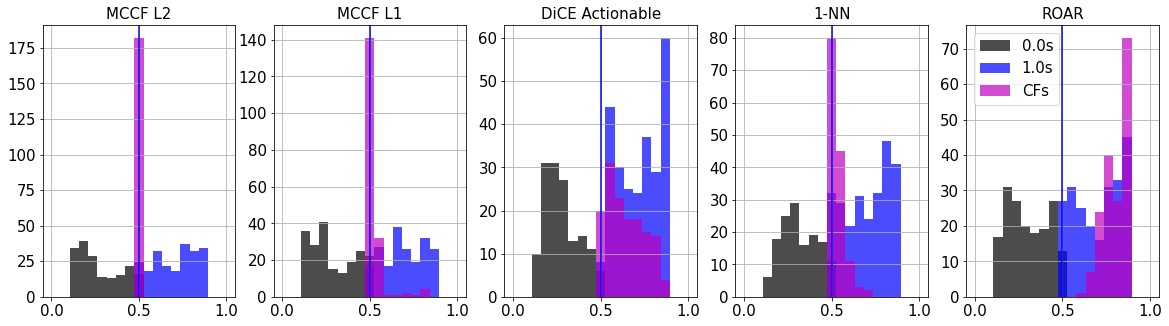

In [8]:
sample = 'all'
ensemble_size = 2
train_surrogates = False
num_queries = 2
architecture = 0

mccfL2preds = fetch_predictions('results/cftype_mccfL2_heloc', 'heloc', sample, architecture, num_queries, ensemble_size=ensemble_size, train_surrogates=train_surrogates)
mccfL1preds = fetch_predictions('results/cftype_mccfL1_heloc', 'heloc', sample, architecture, num_queries, ensemble_size=ensemble_size, train_surrogates=train_surrogates)
dicepreds = fetch_predictions('results/cftype_diceact_heloc', 'heloc', sample, architecture, num_queries, ensemble_size=ensemble_size, train_surrogates=train_surrogates)
knnpreds = fetch_predictions('results/cftype_knn_heloc', 'heloc', sample, architecture, num_queries, ensemble_size=ensemble_size, train_surrogates=train_surrogates)
roarpreds = fetch_predictions('results/cftype_roar_heloc', 'heloc', sample, architecture, num_queries, ensemble_size=ensemble_size, train_surrogates=train_surrogates)

fig, axs = plt.subplots(1, 5)
fig.set_figheight(5)
fig.set_figwidth(20)

plot_prediction_histogram(axs[0], mccfL2preds['pred_targ'], mccfL2preds['queries_y'], title='MCCF L2')
plot_prediction_histogram(axs[1], mccfL1preds['pred_targ'], mccfL1preds['queries_y'], title='MCCF L1')
plot_prediction_histogram(axs[2], dicepreds['pred_targ'], dicepreds['queries_y'], title='DiCE Actionable')
plot_prediction_histogram(axs[3], knnpreds['pred_targ'], knnpreds['queries_y'], title='1-NN')
plot_prediction_histogram(axs[4], roarpreds['pred_targ'], roarpreds['queries_y'], title='ROAR')

plt.legend()
plt.show()